## Mathematical exercises: Pinhole camera
In these exercises we will assume a $modern$ camera with completely square pixels. What are the skew parameters then?

### Exercise 2.1
Reuse the box3d function from last week. Assume that $f$ = 600, $α$ = 1, $β$ = 0, and ${\delta}_x$ = ${\delta}_y$ = 400.
Given a traditional camera, what is the resolution in pixels?
>In a traditional camera, the principal point is exactly in the middle of the sensor. So, for this
camera the sensor has 2 × 400 = 800 pixels along each dimension i.e. a resolution of 800 × 800
pixels.

Also assume $R$ = $I$, and $t = \begin{bmatrix}
0 \\ 0.2 \\ 1.5
\end{bmatrix}$
. Use projectpoints from last week, to project the
points.

Are all the points are captured by the image sensor?
Where does the corner $P_1$ = [−0.5,−0.5,−0.5] project to?
>The projection matrix reads $ p = \begin{bmatrix}
600 & 0 & 400 & 600 \\ 0 & 600 & 400 & 720  \\ 0 & 0 & 1 & 1.5
\end{bmatrix}
$ Some points have an $y$ value greater than 800, and are not visible in the image, as they are outside
the image sensor. $P_1$ projects to $[100,400]^T$

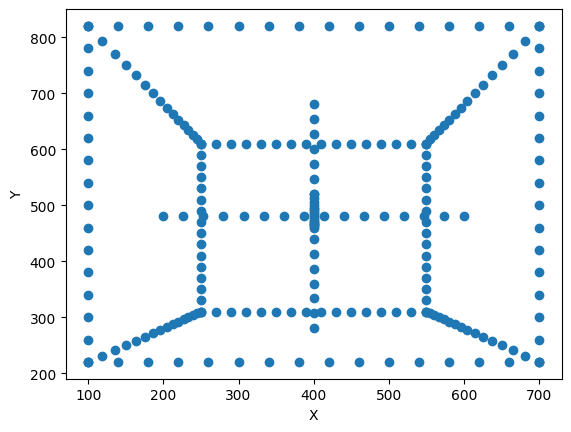

P1 projects to:  [[100.]
 [220.]]


In [13]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

def plot_box3d(n=16):
    points = box3d(n)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[0], points[1], points[2])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()

def Pi(ph):
    return ph[:-1]/ph[-1]

def PiInv(p):
    ones = np.ones((1, p.shape[1]))
    ph = np.vstack((p, ones))
    return ph

def projectpoints(K, R, t, Q):
    Q_homogeneous = PiInv(Q)
    P = K @ np.hstack((R, t)) @ Q_homogeneous
    p = Pi(P)
    return p[:2]

def plot_figure(p):
    plt.scatter(p[0], p[1])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


Q = box3d()
K = np.array([[600, 0, 400], [0, 600, 400], [0, 0, 1]])
R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
t = np.array([[0], [0.2], [1.5]])
P1 = np.array([[-0.5,-0.5,-0.5]]).T
p = projectpoints(K, R, t, Q)
p1 = projectpoints(K, R, t, P1)

plot_figure(p)
print("P1 projects to: ", p1)

### Exercise 2.2
Create a new or change your function projectpoints to a version that also takes distCoeffs as
an input. The list distCoeffs should contain the distortion coefficients $[k3, k5, k7, . . . ]$. Make the
function work for at least 3 coefficients.